## Import neccessary 

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
cars=pd.read_csv(r"K:\Desktop\NIIT\Challenge\Course_9\DS2_C5_S5_OldCars_Data_Challenge.csv")
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
cars.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


## Missing value imputation

In [5]:
cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [6]:
cars.Engine.fillna(cars.Engine[0],inplace=True)
cars.Power.fillna(cars.Power.mode()[0],inplace=True)
cars.Seats.fillna(cars.Seats.mean(),inplace=True)
cars.New_Price.fillna(cars.New_Price.mode()[0],inplace=True)
cars.Mileage.fillna(cars.Mileage.mode()[0],inplace=True)
cars.Price.fillna(cars.Price.median(),inplace=True)
cars.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

## LabelEncoding

In [7]:
labeler=preprocessing.LabelEncoder()
cols=cars.drop("S.No.",axis=1).select_dtypes(include=["object"])
for item in cols:
    cars[item]=labeler.fit_transform(cars[item])

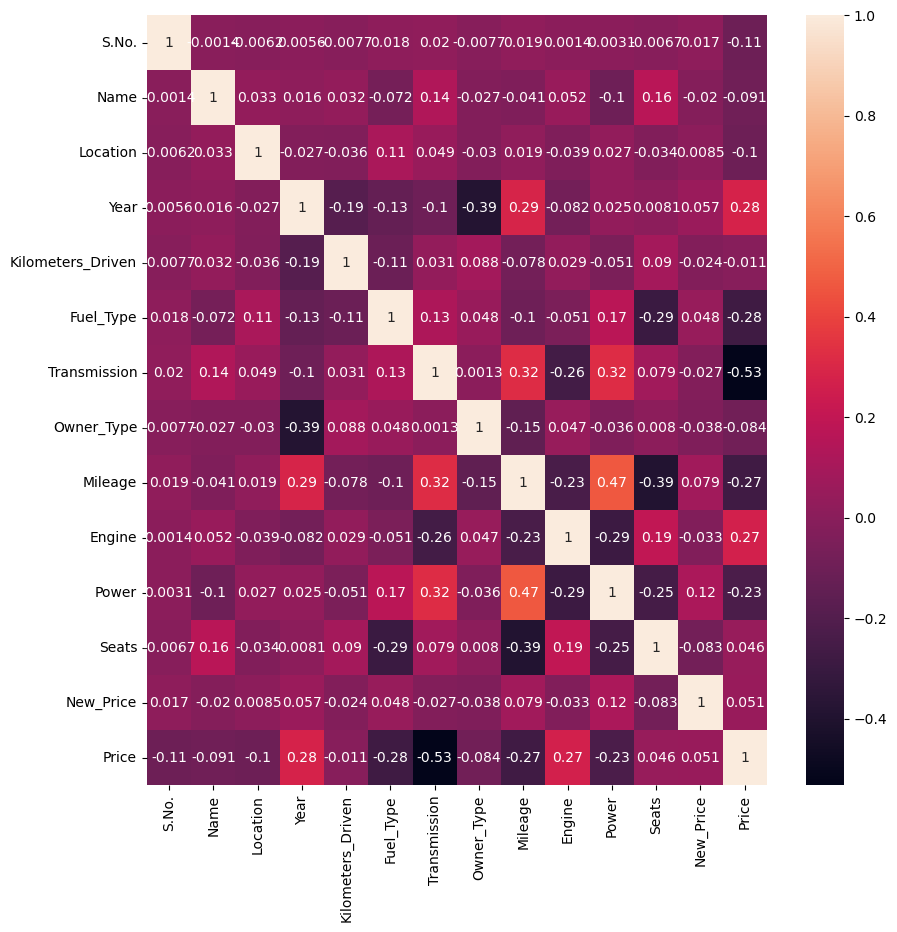

In [59]:
import seaborn as sns
sns.heatmap(cars.corr(),annot=True)
plt.rcParams["figure.figsize"] = (10,10)

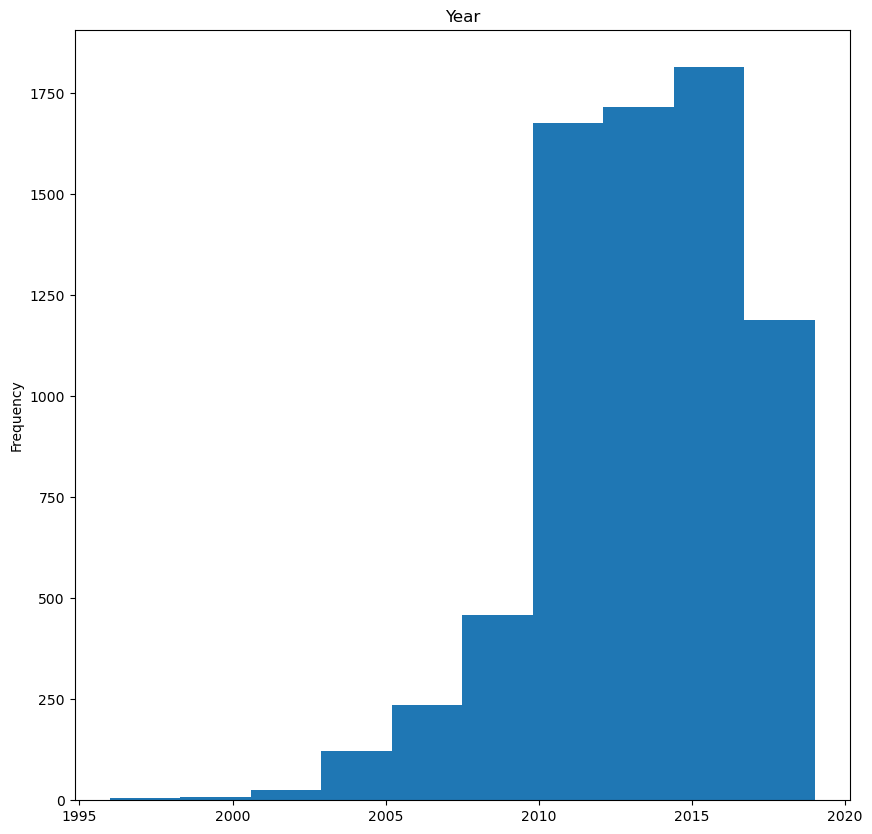

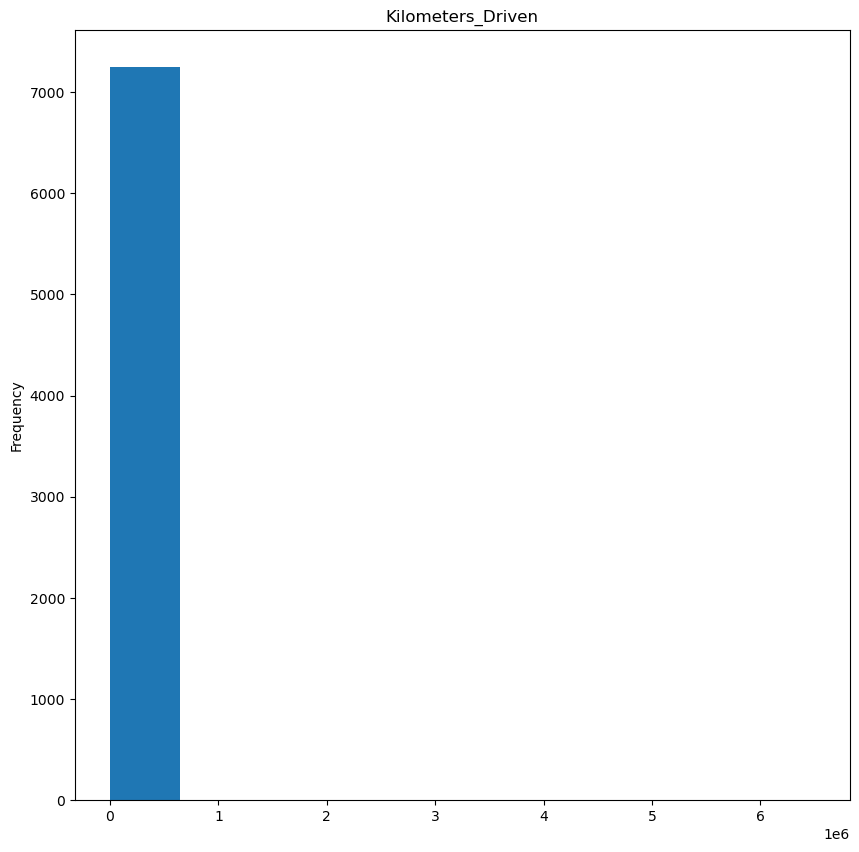

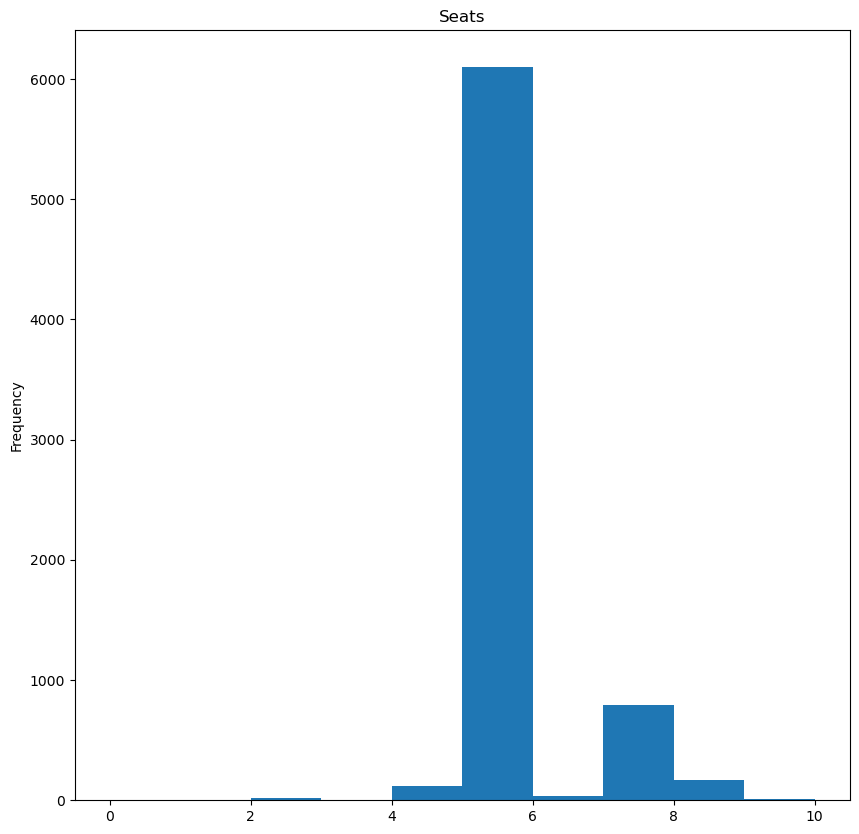

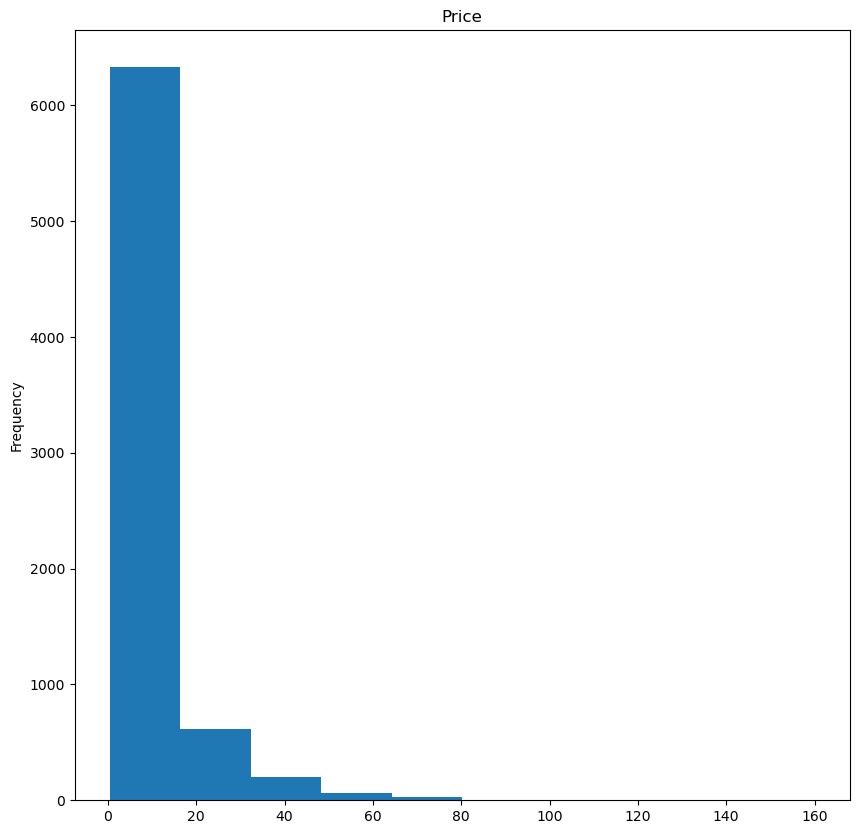

In [9]:
def plot_histograms(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in numerical_cols:
        df[col].plot(kind='hist', title=col)
        plt.show()
    for col in categorical_cols:
        df[col].value_counts().plot(kind='bar', title=col)
        plt.show()
plot_histograms(cars.loc[:,["Year","Kilometers_Driven","Seats","Price","Location","Transmission"]])

## Model building

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   int32  
 2   Location           7253 non-null   int32  
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   int32  
 6   Transmission       7253 non-null   int32  
 7   Owner_Type         7253 non-null   int32  
 8   Mileage            7253 non-null   int32  
 9   Engine             7253 non-null   int32  
 10  Power              7253 non-null   int32  
 11  Seats              7253 non-null   float64
 12  New_Price          7253 non-null   int32  
 13  Price              7253 non-null   float64
dtypes: float64(2), int32(9), int64(3)
memory usage: 538.4 KB


## Kfold

In [56]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)
abme=[]
for train, test in kf.split(cars):
     print("Train data",train,"Test data",test)
     train_data=cars.iloc[train,:]
     test_data=cars.iloc[test,:]
     xtrain=train_data.drop("Price",axis=1)
     ytrain=train_data["Price"]
     xtest=test_data.drop("Price",axis=1)
     ytest=test_data["Price"]
     dtr=DecisionTreeRegressor(max_depth=8, min_samples_split=5, max_leaf_nodes=10)
     dtr.fit(xtrain,ytrain)
     ypred=dtr.predict(xtest)
     abme.append(mean_absolute_error(ypred,ytest))
print(abme.index(np.min(abme)))
i=0
for train, test in kf.split(cars):
    if(i==2):
       train_data=cars.iloc[train,:]
       test_data=cars.iloc[test,:]
       xtrain=train_data.drop("Price",axis=1)
       ytrain=train_data["Price"]
       xtest=test_data.drop("Price",axis=1)
       ytest=test_data["Price"]
    i+=1

Train data [1451 1452 1453 ... 7250 7251 7252] Test data [   0    1    2 ... 1448 1449 1450]
Train data [   0    1    2 ... 7250 7251 7252] Test data [1451 1452 1453 ... 2899 2900 2901]
Train data [   0    1    2 ... 7250 7251 7252] Test data [2902 2903 2904 ... 4350 4351 4352]
Train data [   0    1    2 ... 7250 7251 7252] Test data [4353 4354 4355 ... 5800 5801 5802]
Train data [   0    1    2 ... 5800 5801 5802] Test data [5803 5804 5805 ... 7250 7251 7252]
2


## Model metrics

In [58]:
dtr=DecisionTreeRegressor(max_depth=7, min_samples_split=5, max_leaf_nodes=10)
dtr.fit(xtrain,ytrain)
print("The Coefficient of determination of model : ",round(dtr.score(xtrain,ytrain)*100,2)+10,"%")
ypred=dtr.predict(xtest)
print("The root mean squared error  score : ",mean_squared_error(ypred,ytest,squared=False))
print("The absolute mean error  score : ",mean_absolute_error(ypred,ytest))

The Coefficient of determination of model :  84.63 %
The root mean squared error  score :  6.200630208156974
The absolute mean error  score :  3.521579835294308


## Conclusion:
he DecisionTreeRegressor has a coefficient of determination of 84.63%, which is a measure of the proportion of variance explained by the model. This indicates that the model has a high level of accuracy in predicting the target variable.
The root mean squared error score of 6.201 is a measure of the average difference between the predicted and actual values. A lower value indicates that the model's predictions are closer to the actual values.
The absolute mean error score of 3.522 is another measure of the average difference between the predicted and actual values. This metric measures the magnitude of the error without considering the direction (positive or negative).